Назва дисципліни: Обробка та аналіз біомедичних даних

Група: БС-83

Студент: Каліновська Б.В.

Лабораторна робота №5

Тема:Критерій Пірсона для порівняння декількох груп за розподіленням ознаки  

Завдання:

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах

In [66]:
#Імпортуємо бібліотеки які нам будуть потрібні
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [67]:
#Будуємо таблицю спряженості
table = pd.DataFrame({'Gr_1':[10,14,23,32,41],
                   'Gr_2':[17,20,25,40,50]},
                    index = ['Grad_1','Grad_2','Grad_3','Grad_4','Grad_5'])
table

,Gr_1,Gr_2
Grad_1,10,17
Grad_2,14,20
Grad_3,23,25
Grad_4,32,40
Grad_5,41,50


2. Побудувати графік, що відображає розподіл ознак в групах

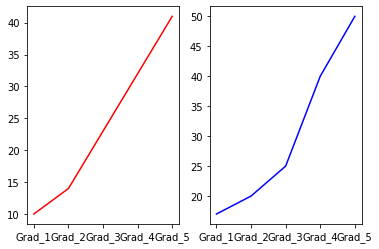

In [68]:
#Для побудови декількох графіків поруч використовують команду subplot 
#create first plot: 1 row, 2 colums, 1st plot
plt.subplot(1, 2, 1) 
plt.plot(table.index, table['Gr_1'], 'r')

#create second plot: 1 row, 2 colums, 2d plot
plt.subplot(1, 2, 2) 
plt.plot(table.index, table['Gr_2'], 'b')

3. Написати функцію, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях 0,01 та 0,05, в залежністі від параметру significant_level, що передається в неї. Врахувати у функції випадок, що сума частот ознаки у групах може бути відмінною

In [69]:
def Pirson_x_sq (table, significant_level, num_level):
    #Визначаємо різницю між екстр та контр частотами для кожної градації
    print("-------------------------------------------")
    print("significant_level = ", significant_level)
    print("-------------------------------------------")
    zm = 0
    prob = 0
    x_emp = 0
    gr_n=[]   #(n-n')^2
    gr_n_div=[] #(n-n')^2 / n'
    
    l_st=len(table.iloc[:,0])
    for i in range(l_st):
        zm = table.iloc[i,0] - table.iloc[i,1]
        zm_sq = zm**2 #(n-n')^2
        gr_n.append(zm_sq)
        zm_sq_div = zm_sq/table.iloc[i,1] #(n-n')^2 / n'
        gr_n_div.append(zm_sq_div)
        x_emp += zm_sq_div #Сума отриманих значень
    #Оформлення таблиці
    table["(n-n')^2"] = gr_n         #додаємо два нових стовбця
    table["(n-n')^2 / n"] = gr_n_div
    print(table)
    print('')
    print("Сума отриманих значень: χ^2 =",x_emp)
    
    #Визначаємо ступінь свободи критерію
    r= l_st - 1
    print("Ступінь свободи: r =",r)
    
    #Робота з файлом
  
    #Загружаємо необхідні бібліотеки
    import xlrd, xlwt
    #Відкриваємо xlsx файл
    rb = xlrd.open_workbook('x_criticale.xlsx')
    #Вибираємо активний лист (індексація з 0)
    sheet = rb.sheet_by_index(0)
    #Отримуємо значення необхідної нам ячейки (номер рядка - тобто ступінь свободи)[номер стовпчика]
    
    x_kr = sheet.row_values(r+1)[num_level]
    print("χ^2 критичне = ", x_kr)
    
    text = 0   
    if((x_emp**2) > (x_kr**2)):
        text = "Розбіжність значима бо χ^2 > χ^2(критичне)"%table
        result = "significant"
    else:
        text = "Розбіжність незначима бо χ^2 < χ^2(критичне)"%table
        result = "not significant"
    print(text)
    print("")
    return result

In [70]:
#Розбіжність на рівні 0,01
Pirson_x_sq (table, 0.01, 1) #3 параметр - це номер стовпця в таблиці для 0.01

-------------------------------------------
significant_level =  0.01
-------------------------------------------
        Gr_1  Gr_2  (n-n')^2  (n-n')^2 / n
Grad_1    10    17        49      2.882353
Grad_2    14    20        36      1.800000
Grad_3    23    25         4      0.160000
Grad_4    32    40        64      1.600000
Grad_5    41    50        81      1.620000

Сума отриманих значень: χ^2 = 8.06235294117647
Ступінь свободи: r = 4
χ^2 критичне =  13.3
Розбіжність незначима бо χ^2 < χ^2(критичне)



'not significant'

In [71]:
#Розбіжність на рівні 0,05
Pirson_x_sq (table, 0.05, 2) #3 параметр - це номер стовпця в таблиці 

-------------------------------------------
significant_level =  0.05
-------------------------------------------
        Gr_1  Gr_2  (n-n')^2  (n-n')^2 / n
Grad_1    10    17        49      2.882353
Grad_2    14    20        36      1.800000
Grad_3    23    25         4      0.160000
Grad_4    32    40        64      1.600000
Grad_5    41    50        81      1.620000

Сума отриманих значень: χ^2 = 8.06235294117647
Ступінь свободи: r = 4
χ^2 критичне =  9.5
Розбіжність незначима бо χ^2 < χ^2(критичне)



'not significant'

4. Додати до таблиці стовбчики з відсотовим розподілом по градаціям всередині груп. Окремо вивести результати роботи критерію (чи є статистична розбіжність між групами)

In [72]:
sum_1 = 0
sum_2 = 0

len_st=len(table.iloc[:,0])

for i in range(len_st):
    sum_1 += table.iloc[i,0]
    
for i in range(len_st):
    sum_2 += table.iloc[i,1]

gr_1_per = []
gr_2_per = []

tmp1 = 0
for i in range(len_st):
    tmp1 = (table.iloc[i,0] * 100) / sum_1
    tmp1 = float('{:.5f}'.format(tmp1)) #Скорочуємо кількість знаків після коми до 5
    gr_1_per.append(tmp1)

tmp2 = 0
for i in range(len_st):
    tmp2 = (table.iloc[i,1] * 100) / sum_2
    tmp2 = float('{:.5f}'.format(tmp2)) #Скорочуємо кількість знаків після коми до 5
    gr_2_per.append(tmp2)

#Формуємо таблицю
new_table = pd.DataFrame({'Gr_1':[10,14,23,32,41],
                   'Gr_2':[17,20,25,40,50]},
                    index = ['Grad_1','Grad_2','Grad_3','Grad_4','Grad_5'])

new_table["Gr_1 %"] = gr_1_per         #додаємо два нових стовбця
new_table["Gr_2 %"] = gr_2_per
print(new_table)

        Gr_1  Gr_2    Gr_1 %    Gr_2 %
Grad_1    10    17   8.33333  11.18421
Grad_2    14    20  11.66667  13.15789
Grad_3    23    25  19.16667  16.44737
Grad_4    32    40  26.66667  26.31579
Grad_5    41    50  34.16667  32.89474


In [73]:
#Виводимо результати всієї роботи критерію
result_table = pd.DataFrame( {"Рівень значимості":[Pirson_x_sq (table, 0.01, 1), Pirson_x_sq (table, 0.05, 2)]},
                        index = ["0.01","0.05"])
result_table.columns.name = "significant level"
result_table

-------------------------------------------
significant_level =  0.01
-------------------------------------------
        Gr_1  Gr_2  (n-n')^2  (n-n')^2 / n
Grad_1    10    17        49      2.882353
Grad_2    14    20        36      1.800000
Grad_3    23    25         4      0.160000
Grad_4    32    40        64      1.600000
Grad_5    41    50        81      1.620000

Сума отриманих значень: χ^2 = 8.06235294117647
Ступінь свободи: r = 4
χ^2 критичне =  13.3
Розбіжність незначима бо χ^2 < χ^2(критичне)

-------------------------------------------
significant_level =  0.05
-------------------------------------------
        Gr_1  Gr_2  (n-n')^2  (n-n')^2 / n
Grad_1    10    17        49      2.882353
Grad_2    14    20        36      1.800000
Grad_3    23    25         4      0.160000
Grad_4    32    40        64      1.600000
Grad_5    41    50        81      1.620000

Сума отриманих значень: χ^2 = 8.06235294117647
Ступінь свободи: r = 4
χ^2 критичне =  9.5
Розбіжність незначима бо χ^

significant level,Рівень значимості
0.01,not significant
0.05,not significant


Висновок:

Під час порівняння декількох груп за розподіленням ознаки за допомогою Критерію Пірсона, було отримано результат, що статична розбіжність між групами на рівнях значимості 0.05 і 0.01 є статистично незначимою, так як в двох випадках χ^2 < χ^2(критичне)